<a href="https://colab.research.google.com/github/Usermer/deep-learning-universe/blob/main/01_neural_networks_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neural networks**

c'est quoi neural newtork

**Neural networks**

Un réseau de neurones est un modèle de calcul inspiré par la structure et le fonctionnement du cerveau humain. Il est composé de nœuds (neurones artificiels) organisés en couches. Ces neurones sont interconnectés et traitent des informations pour apprendre à partir de données et effectuer des tâches complexes comme la reconnaissance d'images, la traduction automatique, ou la prise de décisions. Il existe différentes architectures de réseaux de neurones, adaptées à divers types de problèmes.

***ANN*** (artificial neural network)

Un ANN (réseau de neurones artificiel) est un modèle mathématique inspiré du cerveau humain 🧍‍♂️🧠.
Il est composé de neurones artificiels qui collaborent pour apprendre à reconnaître des motifs, faire des prédictions ou prendre des décisions à partir de données.

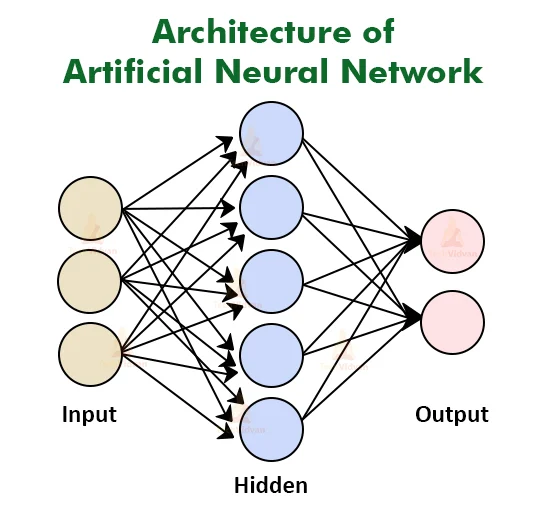

***Perceptron***:Le perceptron est le plus simple modèle de neurone artificiel.
Un perceptron est un neurone unique qui :

prend des entrées (**features**),

les pondère avec des poids (**weights**),

ajoute un biais (**bias**),

puis applique une **fonction d’activation** pour donner une sortie (0 ou 1).

✅Donc, il fait juste La **classification binaire**

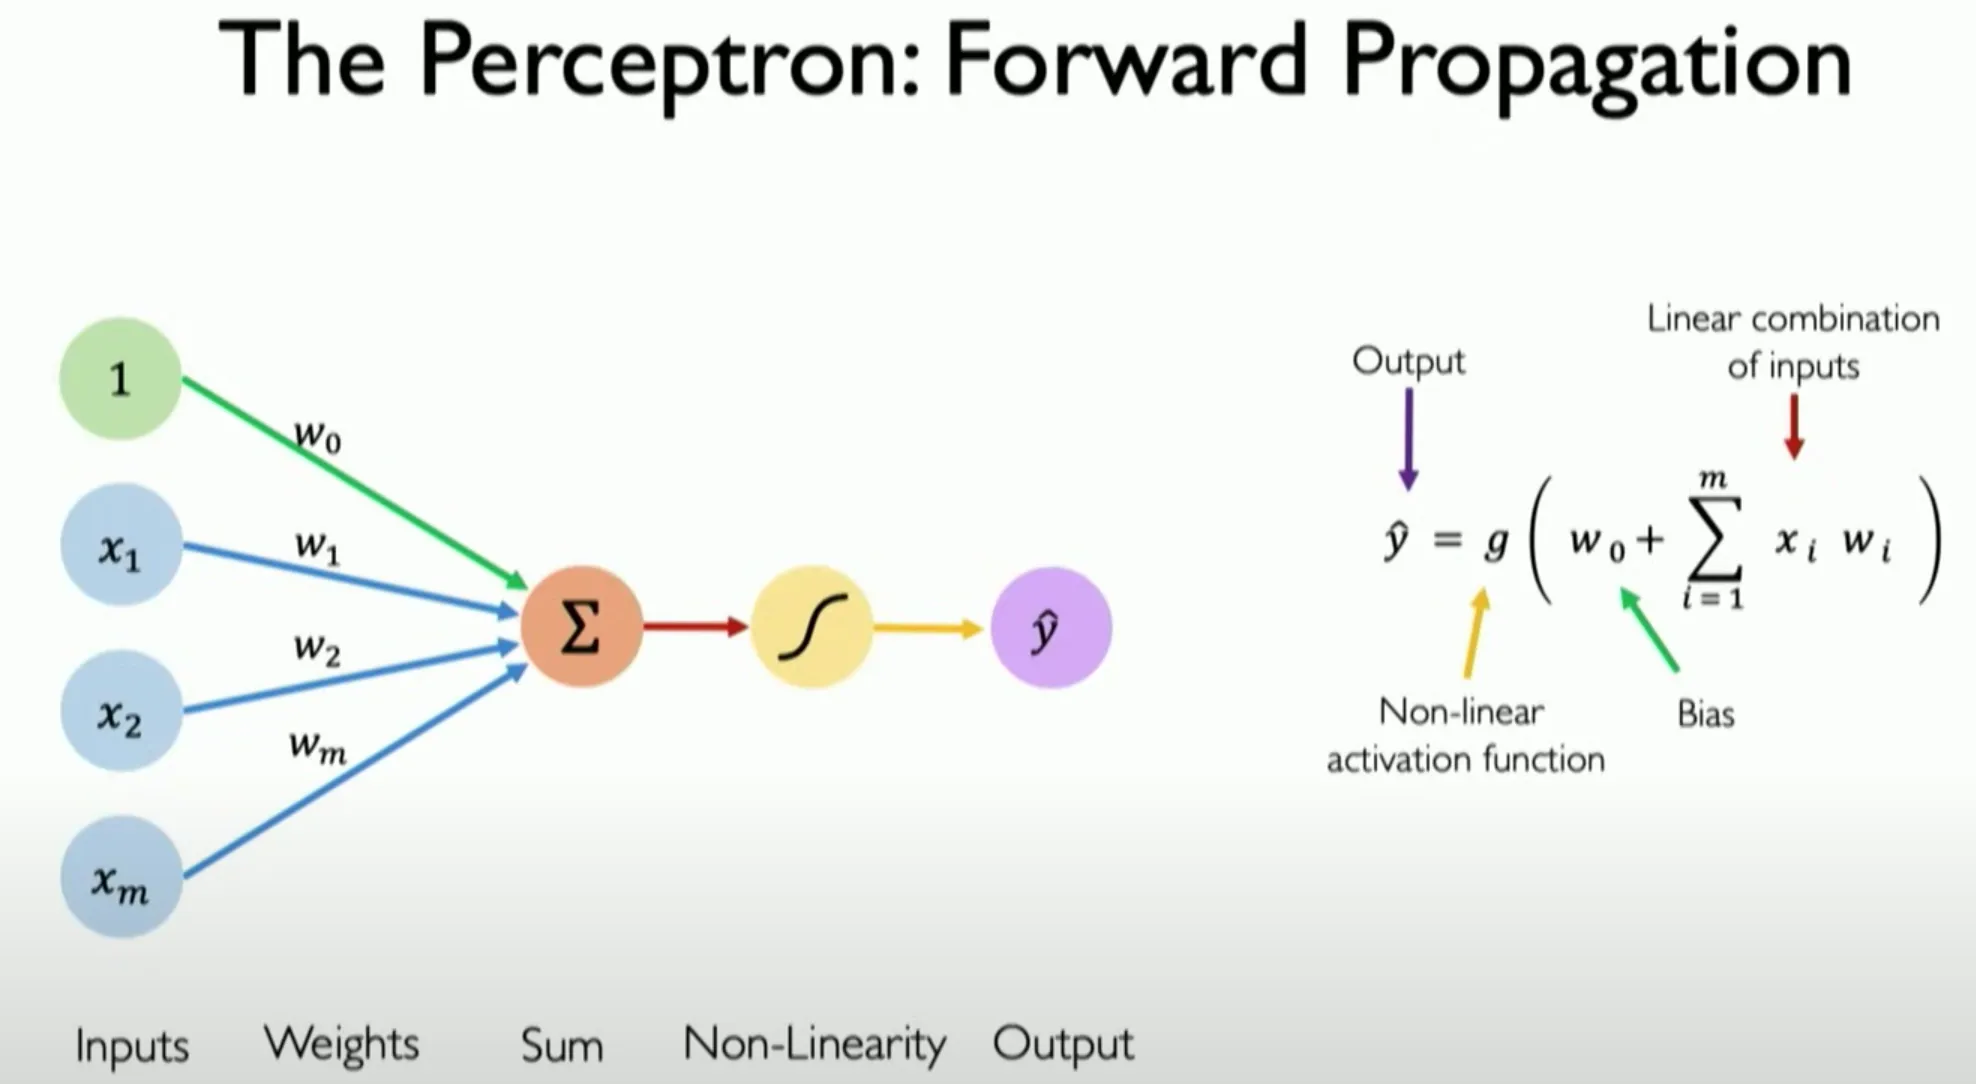

***TLU (Threshold Logic Unit)*** prend la somme pondérée des entrées ,puis applique un seuil (threshold)
✨La TLU agit donc comme une fonction d’activation binaire.
Elle transforme la somme pondérée en décision logique.
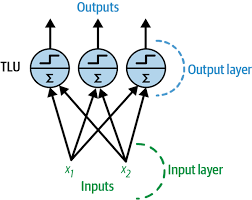

🧩 Phrase à retenir :

Le ***perceptron*** apprend les poids et le biais,
tandis que la ***TLU*** décide, via un seuil, si le neurone s’active ou non.

---



A perceptron is composed of ***one or more TLUs*** organized in a single layer,where every TLU is connected to every input.Such a layer is called a ***fully connected layer***

---



***Problème du TLU***


🔸 Avant (Perceptron classique – 1958)

Le perceptron utilisait une TLU comme fonction d’activation :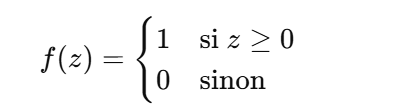

➡️ C’est une fonction de seuil brutale, donc la sortie est binaire (0 ou 1).

🔹Après (Perceptron moderne / Deep Learning)

On a remplacé la TLU par des fonctions d’activation continues, comme :
Sigmoid ,Tanh,ReLU(max(0,x))

Ces fonctions :

permettent **des sorties progressives**(pas juste 0 ou 1),

rendent le modèle différentiable (donc entraînable par gradient),

et introduisent de la non-linéarité (indispensable pour les problèmes complexes).


**Comment le perceptron apprend  ?
(the perceptron rule)**

1️⃣ Initialisation

-Poids 𝑤𝑖 et biais 𝑏
aléatoires

-Choisir un learning rate
𝜂(ex : 0.01 à 0.1)

2️⃣ Propagation avant (Forward pass)
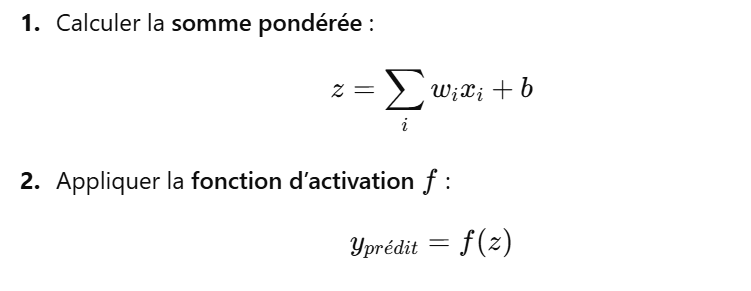

3️⃣ Calcul de l’erreur
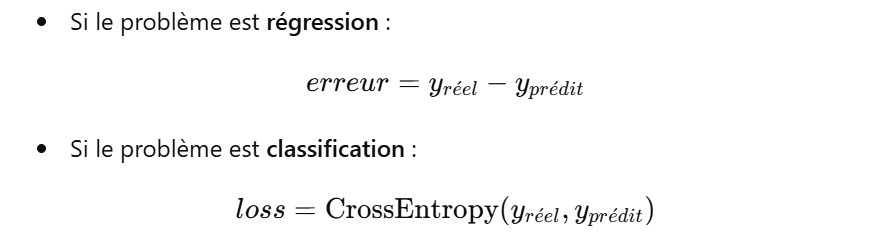

4️⃣ Rétropropagation (Backward pass)

Contrairement à la TLU, une fonction d’activation continue est différentiable, donc on peut calculer le gradient :
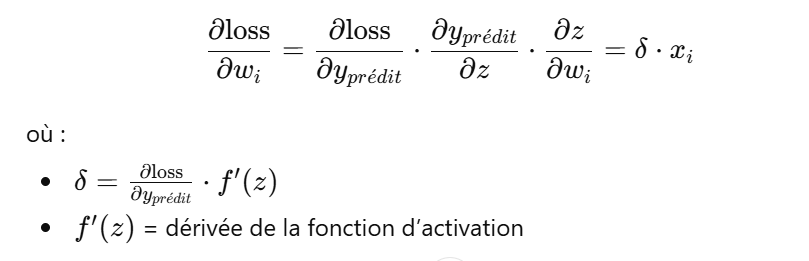

5️⃣ Mise à jour des poids et biais

On applique la descente de gradient :
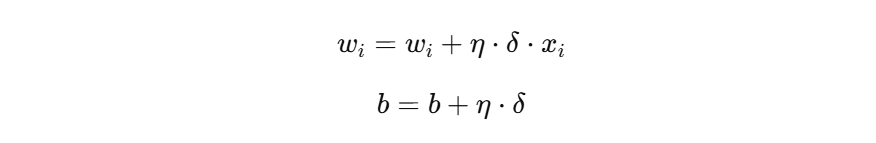
Le gradient indique dans quelle direction ajuster les poids pour réduire l’erreur.
6️⃣ Répétition

Répéter le forward + backward pour tous les exemples du dataset

Pendant plusieurs epochs jusqu’à convergence

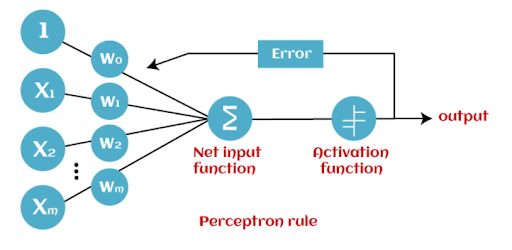

**`MLP (Multi-Layer Perceptron)`**

Un MLP (Multi-Layer Perceptron) est une extension du perceptron simple.

👉 C’est un réseau de neurones composé de plusieurs couches :

**1 input layer**,

1 layer ou plus de TLU formant un **hidden layer**

et 1 layer de TLUs constituant **output layer**


---


Chaque couche est constituée de plusieurs neurones, et chaque neurone d’une couche est connecté à tous les neurones de la couche suivante — c’est un réseau entièrement connecté (**fully connected network**).

**Sequential API**
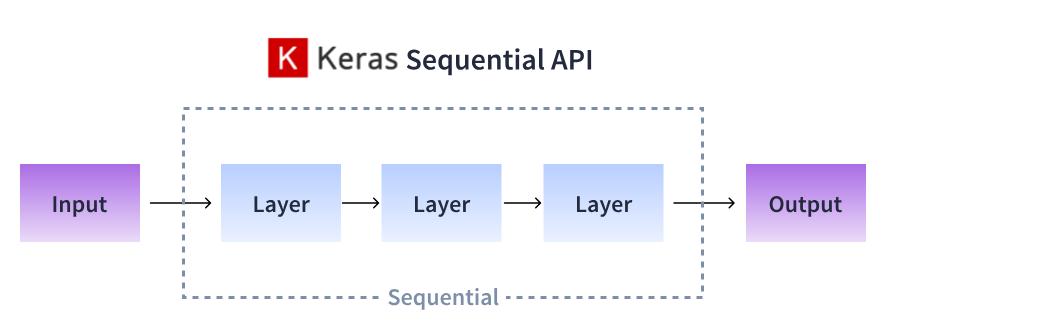

La Sequential API est un moyen simple et courant de construire des modèles de réseaux de neurones couche par couche. Elle permet d'empiler les couches les unes après les autres de manière séquentielle. C'est idéal pour les modèles simples où chaque couche a exactement un tenseur d'entrée et un tenseur de sortie.



In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling1D,MaxPooling2D,Flatten,Dropout

In [8]:
#exemple
model=Sequential([
    Dense(2,activation='relu',input_shape=(4,)),
    Dense(3,activation='relu'),
    Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Couche Dense**

Une couche `Dense` (ou complètement connectée) est une couche où chaque neurone est connecté à tous les neurones de la couche précédente. C'est l'un des types de couches les plus fondamentaux utilisés dans les réseaux de neurones. Elle effectue une transformation linéaire des entrées en appliquant des poids et des biais, suivie généralement par une fonction d'activation.

**Exemple**

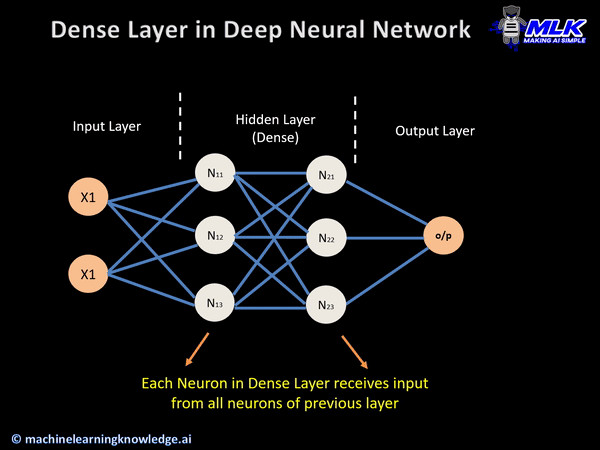

Dans cet exemple, nous allons créer un modèle séquentiel avec deux couches cachées `Dense`.

*   La première couche `Dense` a 3 neurones et prend en entrée des données avec une forme de `(2,)` (ce qui signifie 2 caractéristiques d'entrée). Nous utilisons la fonction d'activation `relu`.
*   La deuxième couche `Dense` a également 3 neurones et utilise la fonction d'activation `relu`. Elle reçoit les sorties de la première couche.
*   La couche de sortie `Dense` a un nombre de neurones égal au nombre de classes qu'on souhaitez prédire

In [9]:
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(2,)),  #  Input layer
    Dense(3, activation='relu'),#hidden layer 1
    Dense(3, activation='relu'),#hidden layer 2
    Dense(1, activation='softmax')#output layer
])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

**Comment calculer le nombre de paramètres ?**

Le nombre de paramètres dans un réseau de neurones correspond aux poids (weights) et aux biais (biases) que le modèle apprend pendant l'entraînement. Chaque connexion entre les neurones a un poids associé, et chaque neurone (sauf les neurones d'entrée) a un biais.

Pour une couche `Dense`, le calcul est le suivant :

**Nombre de paramètres = (Nombre de neurones de la couche précédente \* Nombre de neurones de la couche actuelle) + Nombre de neurones de la couche actuelle (pour les biais)**

Par exemple, dans un modèle avec une couche d'entrée de 2 neurones, une couche cachée `Dense` de 4 neurones, et une couche de sortie `Dense` de 1 neurone :

*   **Couche cachée `Dense` (4 neurones):** (2 \* 4) + 4 = 12 paramètres
*   **Couche de sortie `Dense` (1 neurone):** (4 \* 1) + 1 = 5 paramètres

Le total des paramètres est la somme des paramètres de chaque couche entraînable.



---



**les fonctions d'activation**

Les fonctions d'activation sont des composants essentiels des réseaux de neurones. Elles sont appliquées à la sortie de chaque neurone (ou de chaque couche, selon l'architecture). Leur rôle principal est d'introduire de la **non-linéarité** dans le modèle, permettant au réseau d'apprendre des motifs complexes qui ne pourraient pas être modélisés par de simples transformations linéaires.

**Fonctions d'activation pour les couches cachées :**

Ces fonctions sont utilisées dans les couches intermédiaires d'un réseau pour transformer les sorties linéaires des neurones en valeurs non linéaires.

*   **ReLU (Rectified Linear Unit):** `f(x) = max(0, x)`. Très populaire et efficace dans la plupart des cas. Simple et rapide à calculer. Aide à prévenir le problème du gradient évanescent.
*   **Leaky ReLU:** Une variation de ReLU qui permet un petit gradient pour les entrées négatives, aidant à éviter le problème des "neurones morts".
*   **Sigmoid:** `f(x) = 1 / (1 + exp(-x))`. Comprime la sortie entre 0 et 1. Historiquement très utilisée, mais peut souffrir du problème du gradient évanescent pour de grandes entrées positives ou négatives.
*   **Tanh (Tangente hyperbolique):** `f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x))`. Comprime la sortie entre -1 et 1. Similaire à la Sigmoid, mais centrée autour de zéro, ce qui peut aider à l'entraînement.

**Fonctions d'activation pour la couche de sortie :**

Le choix de la fonction d'activation de la couche de sortie dépend du type de problème que vous essayez de résoudre :

*   **Classification Binaire (2 classes) : Sigmoid**
    *   La fonction Sigmoid est souvent utilisée pour la couche de sortie dans les problèmes de classification binaire. Elle renvoie une valeur entre 0 et 1, qui peut être interprétée comme la probabilité que l'entrée appartienne à la classe positive.
*   **Classification Multi-classes (> 2 classes) : Softmax**
    *   La fonction Softmax est utilisée pour la couche de sortie dans les problèmes de classification multi-classes. Elle convertit les sorties brutes du réseau en une distribution de probabilité sur les différentes classes. La somme de toutes les sorties Softmax est égale à 1.
*   **Régression : Pas de fonction d'activation (ou linéaire)**
    *   Pour les problèmes de régression (où l'on prédit une valeur continue), il n'y a généralement pas de fonction d'activation appliquée à la couche de sortie, ou une fonction d'activation linéaire (identité) est implicitement utilisée. La sortie est la valeur brute prédite par le neurone.

Le choix de la fonction d'activation est important pour la performance du modèle. ReLU est un bon point de départ pour les couches cachées, tandis que Sigmoid ou Softmax sont utilisées pour la couche de sortie en fonction du type de classification.

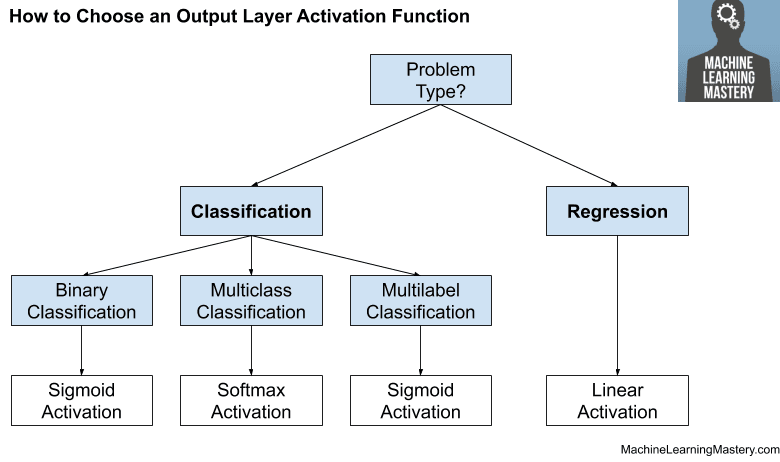

**Compilation**

Une fois que l'architecture de votre modèle de réseau de neurones est définie (c'est-à-dire que vous avez ajouté toutes vos couches), l'étape suivante est la **compilation**. Cette étape configure le modèle pour l'entraînement. Lors de la compilation, vous devez spécifier trois éléments essentiels :

1.  **L'Optimiseur (`optimizer`) :** C'est l'algorithme qui va ajuster les poids et les biais du réseau pendant l'entraînement pour minimiser la fonction de perte. Des optimiseurs courants incluent Adam, SGD (Stochastic Gradient Descent), RMSprop, etc. L'optimiseur utilise le gradient calculé lors de la rétropropagation pour savoir comment modifier les paramètres.

2.  **La Fonction de Perte (`loss`) :** C'est une mesure de l'erreur entre les prédictions de votre modèle et les valeurs réelles (les étiquettes ou les valeurs cibles). L'objectif de l'entraînement est de minimiser cette fonction de perte. Le choix de la fonction de perte dépend du type de problème :
    *   Classification binaire : `binary_crossentropy`
    *   Classification multi-classes : `categorical_crossentropy` (pour les étiquettes one-hot encoded) ou `sparse_categorical_crossentropy` (pour les étiquettes sous forme d'entiers)
    *   Régression : `mse` (Mean Squared Error) ou `mae` (Mean Absolute Error)

3.  **Les Métriques (`metrics`) :** Ce sont des mesures utilisées pour évaluer la performance de votre modèle pendant l'entraînement et l'évaluation. Elles ne sont pas utilisées pour l'optimisation, mais pour vous donner une idée de la performance du modèle d'une manière plus interprétable que la fonction de perte. Les métriques courantes incluent :
    *   `accuracy` (précision) pour les problèmes de classification.
    *   `mae` (Mean Absolute Error) ou `mse` (Mean Squared Error) pour les problèmes de régression.

La compilation se fait généralement en appelant la méthode `.compile()` sur votre objet modèle

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(2,)),  #  Input layer
    Dense(3, activation='relu'),#hidden layer 1
    Dense(3, activation='relu'),#hidden layer 2
    Dense(1, activation='softmax')#output layer
])

model.summary()

model.compile(
    optimizer="Adam",
    loss="mse",
    metrics=["accuracy"]
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25 (100.00 B)

 Trainable params: 25 (100.00 B)

 Non-trainable params: 0 (0.00 B)

**🔥 Fit - L'entraînement en action !**

La méthode `model.fit()` est le cœur du processus d'apprentissage pour notre réseau de neurones. C'est elle qui lance l'entraînement en utilisant vos données.

Voici ce qu'elle fait en résumé :

1.  **Itération sur les Données :** Elle parcourt vos données d'entraînement par petits groupes (appelés **batches**).
2.  **Propagation Avant (Forward Pass) :** Pour chaque batch, elle envoie les données à travers le réseau pour obtenir des prédictions.
3.  **Calcul de la Perte (Loss Calculation) :** Elle compare les prédictions du modèle avec les valeurs réelles (les étiquettes) en utilisant la fonction de perte que vous avez spécifiée lors de la compilation. Cela mesure l'erreur du modèle.
4.  **Rétropropagation (Backward Pass) :** Elle calcule les gradients de la fonction de perte par rapport aux poids et aux biais du modèle. Ces gradients indiquent dans quelle direction les paramètres doivent être ajustés pour réduire l'erreur.
5.  **Mise à Jour des Paramètres (Parameter Update) :** En utilisant l'optimiseur spécifié lors de la compilation, elle ajuste les poids et les biais du modèle en se basant sur les gradients calculés. C'est cette étape qui permet au modèle d'apprendre.

Ce cycle de propagation avant, calcul de la perte, rétropropagation et mise à jour des paramètres est répété pour chaque batch de données. Une fois que le modèle a parcouru toutes les données d'entraînement, cela constitue une **époque (`epoch`)**. L'entraînement se poursuit généralement sur plusieurs époques.

**Arguments importants de `model.fit()` :**

*   `X_train`, `y_train` : Vos données d'entraînement (caractéristiques et étiquettes). Ce sont les données que le modèle utilise pour apprendre.
*   `epochs` : Le nombre d'époques pendant lesquelles le modèle va s'entraîner. Plus d'époques peuvent améliorer les performances, mais attention au surapprentissage (overfitting).
*   `batch_size` : La taille du batch. C'est le nombre d'exemples d'entraînement utilisés dans chaque itération avant de mettre à jour les poids du modèle. Une taille de batch plus petite peut introduire plus de bruit dans les mises à jour, mais peut aider à éviter les minima locaux. Une taille plus grande peut accélérer l'entraînement mais nécessite plus de mémoire.
*   `validation_data` : Des données distinctes (X\_val, y\_val) que le modèle n'utilise pas pour l'entraînement, mais pour évaluer ses performances à la fin de chaque époque. C'est crucial pour détecter le surapprentissage.
*   `callbacks` : Des fonctions spéciales qui sont exécutées à différents moments pendant l'entraînement (par exemple, pour sauvegarder le modèle, ajuster le learning rate, arrêter l'entraînement tôt si la performance stagne, etc.).

En résumé, `model.fit()` prend vos données, utilise l'optimiseur et la fonction de perte définis lors de la compilation, et exécute le processus d'entraînement sur plusieurs époques pour que le modèle apprenne à faire de meilleures prédictions.

In [17]:
# C'est parti pour l'entraînement !
#history = model.fit(
   # X_train, y_train,           # Données d'entraînement
    #epochs=10,                  # Nombre de passes complètes sur les données
    #batch_size=32,              # Nombre d'exemples par mise à jour
   # validation_data=(X_test, y_test)  # Données de validation
#)

**`model.predict()` : Faire des prédictions**

La méthode `model.predict()` est utilisée pour générer les prédictions de votre modèle sur de nouvelles données pour lesquelles vous n'avez pas les étiquettes (les valeurs réelles). Elle ne calcule pas la perte ou les métriques de performance ; elle se contente de faire passer les données à travers le réseau et de renvoyer les sorties de la dernière couche.

*   **Quand l'utiliser ?**
    *   Pour obtenir les prédictions sur de nouvelles données inconnues.
    *   Pour visualiser les sorties du modèle sur un ensemble de données (par exemple, pour voir les probabilités de classe pour chaque exemple).

*   **Sortie :**
    *   La sortie de `model.predict()` dépend du type de problème et de la fonction d'activation de la couche de sortie.
        *   Pour la classification binaire avec Sigmoid, elle renverra généralement les probabilités de la classe positive (valeurs entre 0 et 1).
        *   Pour la classification multi-classes avec Softmax, elle renverra un tableau de probabilités pour chaque classe pour chaque exemple.
        *   Pour la régression, elle renverra les valeurs continues prédites.



**`model.evaluate()` : Évaluer la performance du modèle**

La méthode `model.evaluate()` est utilisée pour évaluer la performance de votre modèle sur un ensemble de données (généralement l'ensemble de test) pour lequel vous *connaissez* les étiquettes réelles. Elle calcule la fonction de perte et les métriques que vous avez spécifiées lors de la compilation (`model.compile()`).

*   **Quand l'utiliser ?**
    *   Pour obtenir une mesure quantitative de la performance de votre modèle sur des données qu'il n'a pas vues pendant l'entraînement.
    *   Pour comparer les performances de différents modèles ou configurations.

*   **Sortie :**
    *   La sortie de `model.evaluate()` est généralement une liste ou un dictionnaire contenant la valeur de la fonction de perte et les valeurs des métriques que vous avez spécifiées (par exemple, la perte et la précision).

**En résumé :**

*   **`predict`** : Pour obtenir les sorties du modèle sur de nouvelles données (faire des prédictions).
*   **`evaluate`** : Pour mesurer la performance du modèle sur des données avec des étiquettes connues (calculer la perte et les métriques).